# Criando seu próprio indicador

In [87]:
#!pip install MetaTrader5

## Análise e manipulação de dados

In [88]:
import numpy as np
import pandas as pd

## Dados séries temporais

In [89]:
from datetime import datetime, timedelta
import pytz

In [90]:
# Bibliotecas gráficas

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [91]:
# Integração com MetaTrader 5

import MetaTrader5 as mt5

In [92]:
mt5.initialize()

True

In [93]:
datetime.now()

datetime.datetime(2022, 11, 9, 10, 31, 13, 72557)

In [94]:
# Definir Datas
timezone = pytz.timezone("America/Sao_Paulo")
data_inicio = datetime.now() - timedelta(days=30)
data_fim = datetime.now()
cotacoes_mt5_all = []
tickers_IBOV = ['PETR4', 'ITUB4', 'VALE3']

In [95]:
for ticker in tickers_IBOV:
    cotacoes_mt5_ticker = mt5.copy_rates_range(ticker, mt5.TIMEFRAME_H1, data_inicio,data_fim)
    cotacoes_mt5_ticker = pd.DataFrame(cotacoes_mt5_ticker)
    cotacoes_mt5_ticker['ticker'] = str(ticker)
    cotacoes_mt5_ticker.index = pd.to_datetime(cotacoes_mt5_ticker['time'], unit='s')
    cotacoes_mt5_ticker = cotacoes_mt5_ticker.drop(['time', 'spread', 'real_volume'], axis = 1)
    cotacoes_mt5_all.append(cotacoes_mt5_ticker)

In [96]:
# usar enumare para facilitar a identificação dos elementos da lista.
list(enumerate(tickers_IBOV))

[(0, 'PETR4'), (1, 'ITUB4'), (2, 'VALE3')]

In [97]:
dados_itub = cotacoes_mt5_all[1].copy()
valor_media = 20
dados_itub['corpo'] = abs(dados_itub.close - dados_itub.open)
dados_itub['tam_candle'] = dados_itub.high - dados_itub.low
dados_itub['indicador_corpo_candle'] = dados_itub['corpo'] / dados_itub['tam_candle']
dados_itub['ma'] = dados_itub['indicador_corpo_candle'].rolling(valor_media).mean()
dados_itub

,open,high,low,close,tick_volume,ticker,corpo,tam_candle,indicador_corpo_candle,ma
time,,,,,,,,,,
2022-10-10 14:00:00,28.97,29.10,28.92,29.06,5881,ITUB4,0.09,0.18,0.500000,NaN
2022-10-10 15:00:00,29.05,29.08,28.85,28.86,7170,ITUB4,0.19,0.23,0.826087,NaN
2022-10-10 16:00:00,28.86,29.07,28.78,29.00,12988,ITUB4,0.14,0.29,0.482759,NaN
2022-10-11 10:00:00,28.89,29.14,28.87,29.07,9803,ITUB4,0.18,0.27,0.666667,NaN
2022-10-11 11:00:00,29.07,29.08,28.80,28.88,10320,ITUB4,0.19,0.28,0.678571,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-11-08 14:00:00,29.61,29.63,29.43,29.52,4222,ITUB4,0.09,0.20,0.450000,0.425865
2022-11-08 15:00:00,29.52,29.55,29.29,29.42,4704,ITUB4,0.10,0.26,0.384615,0.420877
2022-11-08 16:00:00,29.43,29.52,29.26,29.43,7993,ITUB4,0.00,0.26,0.000000,0.389627


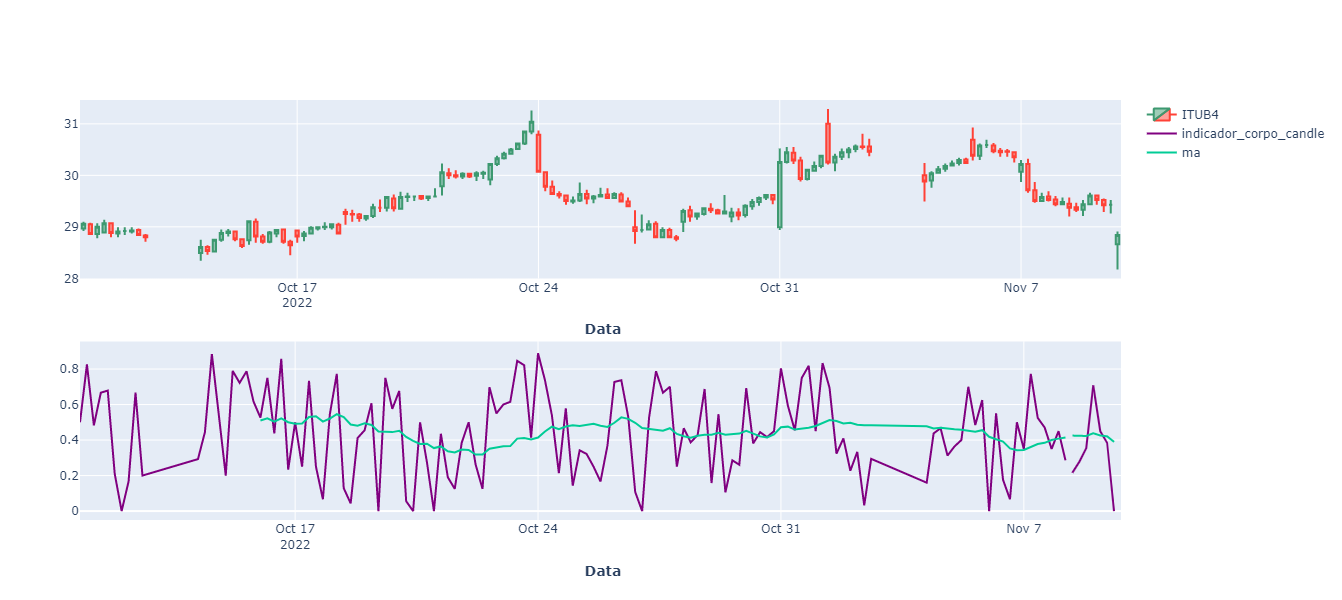

In [121]:
dados_fig = dados_itub
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Candlestick(name=dados_fig['ticker'].iloc[0],x=dados_fig.index, close=dados_fig['close'], open=dados_fig['open'],
                             high=dados_fig['high'], low=dados_fig['low']),row=1,col=1)
fig.add_trace(go.Scatter(name='indicador_corpo_candle',x=dados_fig.index, y=dados_fig['indicador_corpo_candle']), row=2, col=1)
fig.update_traces(line_color='purple', line_width=2, row=2)
fig.add_trace(go.Scatter(name='ma',x=dados_fig.index, y=dados_fig['ma']), row=2, col=1)
fig.update_layout(xaxis_rangeslider_visible=False, height = 600, width = 800)
fig.update_xaxes(title_text="<b> Data",
                          rangebreaks=[
    dict(bounds=["sat", "mon"]), # não mostrar finais de semana
    dict(bounds=[17, 10], pattern="hour"), # não mostrar horas de pregao fechado (observar cada ativo específico)
    ])
fig.show()